In [5]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

# make some data
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.)

# cubic spline of x, y
spl = CubicSpline(x, y)

# get new x
xnew = np.linspace(0,10,num=1001)


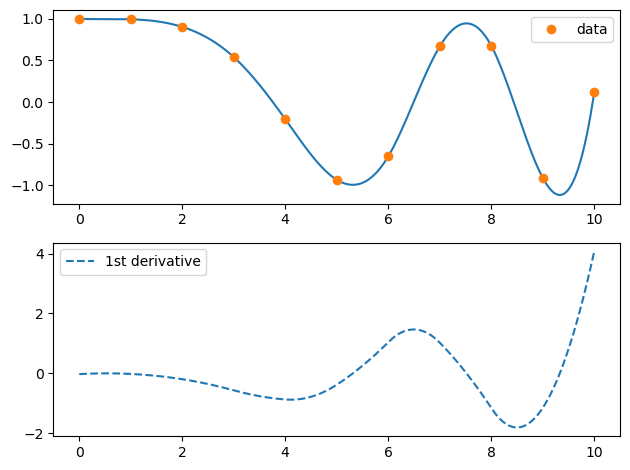

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1)

ax1.plot(xnew, spl(xnew))
ax1.plot(x, y, 'o', label='data')

#plot 1st deriv of spline

ax2.plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')

ax1.legend(loc='best')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

In [8]:
from sklearn.datasets import make_blobs
import pandas as pd

# gen 2d dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
test_data = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:xlabel='x', ylabel='y'>

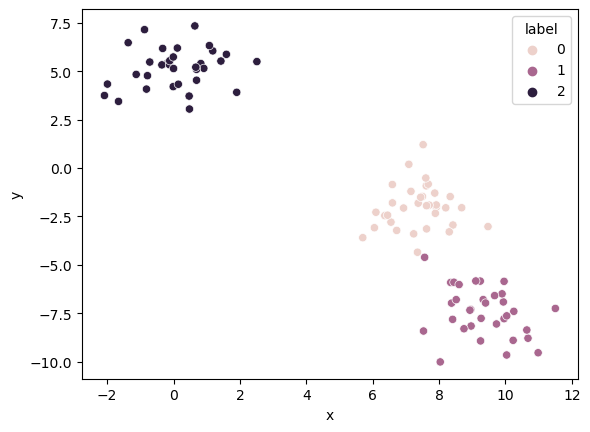

In [10]:
!pip install seaborn # cool package for plotting dataframes 
import seaborn as sns


sns.scatterplot(data=test_data, x='x', y='y', hue='label')

In [11]:
from sklearn.model_selection import train_test_split

# split data into test + train
X_train, X_test, y_train, y_test = train_test_split(test_data[['x','y']], test_data['label'], test_size=.33, random_state=0)

<AxesSubplot:xlabel='x', ylabel='y'>

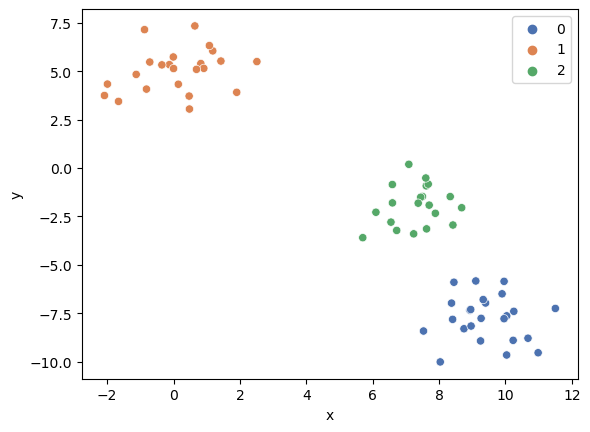

In [17]:
from sklearn.cluster import KMeans

# cluster with 2 clusters
kmeans = KMeans(n_clusters = 3)

kmeans.fit(X_train)

sns.scatterplot(data=X_train, x='x', y='y', hue=kmeans.labels_, palette="deep")